## Preprocessing

In [1]:
# Initial imports
import pandas as pd
from pathlib import Path
from tensorflow.keras.utils import plot_model
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import tree
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.impute import KNNImputer
import numpy as np
import tensorflow as tf
%matplotlib inline

# Read the CSV file
file_path = Path(".\cleaned_college.csv")
df = pd.read_csv(file_path)

# Review the DataFrame
df.head(5)

#export to csv
df.to_csv('df2_cleaned_scorecard.csv', index=False)

In [2]:
# Calculate total cost for in state tuition
df['total_cost'] = df['TUITIONFEE_IN'] + df['CUML_DEBT_N']

# Calculate ROI
df['ROI'] = ((df['mn_earn_wne_p6'] - df['total_cost']) / df['total_cost']) * 100

# Print DataFrame
print(df.head())

   Unnamed: 0                               INSTNM        CITY         ZIP  \
0       46082             ALABAMA A & M UNIVERSITY      NORMAL       35762   
1       46083  UNIVERSITY OF ALABAMA AT BIRMINGHAM  BIRMINGHAM  35294-0110   
2       46084        SOUTHERN CHRISTIAN UNIVERSITY  MONTGOMERY  36117-3553   
3       46085  UNIVERSITY OF ALABAMA IN HUNTSVILLE  HUNTSVILLE       35899   
4       46086             ALABAMA STATE UNIVERSITY  MONTGOMERY  36101-0271   

   NUMBRANCH          HIGHDEG            CONTROL  st_fips  \
0          1  Graduate degree             Public  Alabama   
1          1  Graduate degree             Public  Alabama   
2          1  Graduate degree  Private nonprofit  Alabama   
3          1  Graduate degree             Public  Alabama   
4          1  Graduate degree             Public  Alabama   

                                              region  ADM_RATE_ALL  ...  \
0  Southeast (AL, AR, FL, GA, KY, LA, MS, NC, SC,...      0.445700  ...   
1  Southeast (

In [19]:
df.head(5)

,Unnamed: 0,INSTNM,CITY,ZIP,NUMBRANCH,HIGHDEG,CONTROL,st_fips,region,ADM_RATE_ALL,...,CDR2,DEBT_MDN,CUML_DEBT_N,INC_N,APPL_SCH_N,REPAY_DT_N,mn_earn_wne_p6,relative_success,total_cost,ROI
0,46082,ALABAMA A & M UNIVERSITY,NORMAL,35762,1,Graduate degree,Public,Alabama,"Southeast (AL, AR, FL, GA, KY, LA, MS, NC, SC,...",0.445700,...,0.124,13187.0,2795.0,8122.084872,2862.0,1986.0,30300.000000,yes,6147.0,392.923377
1,46083,UNIVERSITY OF ALABAMA AT BIRMINGHAM,BIRMINGHAM,35294-0110,1,Graduate degree,Public,Alabama,"Southeast (AL, AR, FL, GA, KY, LA, MS, NC, SC,...",0.804900,...,0.037,10500.0,4533.0,5005.000000,5022.0,3733.0,37500.000000,yes,8807.0,325.797661
2,46084,SOUTHERN CHRISTIAN UNIVERSITY,MONTGOMERY,36117-3553,1,Graduate degree,Private nonprofit,Alabama,"Southeast (AL, AR, FL, GA, KY, LA, MS, NC, SC,...",0.695113,...,0.028,10158.0,272.0,8122.084872,312.0,235.0,31506.290442,yes,9712.0,224.405791
3,46085,UNIVERSITY OF ALABAMA IN HUNTSVILLE,HUNTSVILLE,35899,1,Graduate degree,Public,Alabama,"Southeast (AL, AR, FL, GA, KY, LA, MS, NC, SC,...",0.875600,...,0.047,10500.0,1962.0,8122.084872,1939.0,1435.0,40600.000000,yes,6088.0,566.885677
4,46086,ALABAMA STATE UNIVERSITY,MONTGOMERY,36101-0271,1,Graduate degree,Public,Alabama,"Southeast (AL, AR, FL, GA, KY, LA, MS, NC, SC,...",0.504200,...,0.179,9938.0,3864.0,3295.000000,3308.0,2034.0,25300.000000,yes,7464.0,238.960343


In [3]:
# Optimizing model, drop columns
drop_columns = ['CITY', 'ZIP', 'NUMBRANCH', 'st_fips', 'region', 'CURROPER', 'C150_4', 'D150_4', 'CDR2', 'REPAY_DT_N', 'relative_success']
df.drop(drop_columns, axis=1, inplace=True)


In [4]:
#export to csv
df.to_csv('df2_cleaned_scorecard.csv', index=False)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32688 entries, 0 to 32687
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      32688 non-null  int64  
 1   INSTNM          32688 non-null  object 
 2   HIGHDEG         32688 non-null  object 
 3   CONTROL         32688 non-null  object 
 4   ADM_RATE_ALL    32688 non-null  float64
 5   SATVRMID        32688 non-null  float64
 6   SATMTMID        32688 non-null  float64
 7   SAT_AVG         32688 non-null  float64
 8   UGDS            32688 non-null  float64
 9   TUITIONFEE_IN   32688 non-null  float64
 10  TUITIONFEE_OUT  32688 non-null  float64
 11  INEXPFTE        32688 non-null  float64
 12  AVGFACSAL       32688 non-null  float64
 13  DEBT_MDN        32688 non-null  float64
 14  CUML_DEBT_N     32688 non-null  float64
 15  INC_N           32688 non-null  float64
 16  APPL_SCH_N      32688 non-null  float64
 17  mn_earn_wne_p6  32688 non-null 

In [5]:
# Convert categorical data to numeric with `pd.get_dummies`
df_dummies = pd.get_dummies(df, columns=['INSTNM', 'HIGHDEG', 'CONTROL', ])
df_dummies.reset_index(inplace=True)
df_dummies.head(10)

,index,Unnamed: 0,ADM_RATE_ALL,SATVRMID,SATMTMID,SAT_AVG,UGDS,TUITIONFEE_IN,TUITIONFEE_OUT,INEXPFTE,...,INSTNM_Zion Bible College,INSTNM_duCret School of Arts,HIGHDEG_Associate degree,HIGHDEG_Bachelor's degree,HIGHDEG_Certificate degree,HIGHDEG_Graduate degree,HIGHDEG_Non-degree-granting,CONTROL_Private for-profit,CONTROL_Private nonprofit,CONTROL_Public
0,0,46082,0.445700,529.020503,532.6815,850.000000,5292.0,3352.000000,6184.000000,3470.0,...,False,False,False,False,False,True,False,False,False,True
1,1,46083,0.804900,529.020503,532.6815,1010.000000,10381.0,4274.000000,9494.000000,14509.0,...,False,False,False,False,False,True,False,False,False,True
2,2,46084,0.695113,529.020503,532.6815,1052.416171,336.0,9440.000000,9440.000000,3485.0,...,False,False,False,False,False,True,False,False,True,False
3,3,46085,0.875600,575.000000,570.0000,1130.000000,4966.0,4126.000000,8702.000000,5926.0,...,False,False,False,False,False,True,False,False,False,True
4,4,46086,0.504200,529.020503,532.6815,1052.416171,4941.0,3600.000000,7200.000000,3774.0,...,False,False,False,False,False,True,False,False,False,True
5,5,46087,0.867000,529.020503,532.6815,1090.000000,15548.0,4134.000000,11294.000000,6358.0,...,False,False,False,False,False,True,False,False,False,True
6,6,46088,0.695113,529.020503,532.6815,1052.416171,1992.0,2296.000000,4560.000000,3918.0,...,False,False,True,False,False,False,False,False,False,True
7,7,46089,0.695113,529.020503,532.6815,1052.416171,2421.0,10866.251959,12950.010672,4104.0,...,False,False,False,True,False,False,False,False,False,True
8,8,46090,0.991700,529.020503,532.6815,930.000000,4355.0,4130.000000,11930.000000,4472.0,...,False,False,False,False,False,True,False,False,False,True
9,9,46091,0.776000,555.000000,570.0000,1125.000000,19145.0,4426.000000,12886.000000,6553.0,...,False,False,False,False,False,True,False,False,False,True


In [6]:
# Use the `StandardScaler()` module from scikit-learn to normalize the numerical columns

scaled_columns = ['ADM_RATE_ALL', 'SATVRMID', 'SATMTMID', 'SAT_AVG', 'UGDS', 'TUITIONFEE_IN', 'TUITIONFEE_OUT', 'INEXPFTE',
                        'AVGFACSAL', 'DEBT_MDN', 'CUML_DEBT_N', 'INC_N',
                        'APPL_SCH_N', 'mn_earn_wne_p6','ROI']

# Create a scaler object
scaler = StandardScaler()

# Create new dataframe
df_scaled = pd.DataFrame(scaler.fit_transform(df[scaled_columns]), columns=scaled_columns)

# Display the new scaled DataFrame
print(df_scaled.head())

   ADM_RATE_ALL      SATVRMID      SATMTMID   SAT_AVG      UGDS  \
0 -1.677996e+00 -3.911330e-15 -1.133203e-10 -3.406162  0.578533   
1  7.386195e-01 -3.911330e-15 -1.133203e-10 -0.713759  1.594660   
2 -7.469327e-16 -3.911330e-15 -1.133203e-10  0.000000 -0.411037   
3  1.214273e+00  1.581898e+00  1.229855e+00  1.305543  0.513441   
4 -1.284421e+00 -3.911330e-15 -1.133203e-10  0.000000  0.508449   

   TUITIONFEE_IN  TUITIONFEE_OUT  INEXPFTE  AVGFACSAL  DEBT_MDN  CUML_DEBT_N  \
0      -1.065734       -1.064602 -0.009516  -0.280390  0.864610    -0.116472   
1      -0.934968       -0.543788 -0.002726   0.844709  0.261179    -0.058953   
2      -0.202283       -0.552285 -0.009507  -1.537815  0.184375    -0.199970   
3      -0.955959       -0.668406 -0.008005   0.536808  0.261179    -0.144040   
4      -1.030560       -0.904739 -0.009329  -0.263607  0.134968    -0.081094   

          INC_N  APPL_SCH_N  mn_earn_wne_p6       ROI  
0 -5.837163e-17   -0.111170   -1.153906e-01  0.089462  
1 -1

In [7]:
#Merge dataframes
df_merged = pd.concat([df_scaled, df_dummies], axis=1)
df_merged.head(5)

,ADM_RATE_ALL,SATVRMID,SATMTMID,SAT_AVG,UGDS,TUITIONFEE_IN,TUITIONFEE_OUT,INEXPFTE,AVGFACSAL,DEBT_MDN,...,INSTNM_Zion Bible College,INSTNM_duCret School of Arts,HIGHDEG_Associate degree,HIGHDEG_Bachelor's degree,HIGHDEG_Certificate degree,HIGHDEG_Graduate degree,HIGHDEG_Non-degree-granting,CONTROL_Private for-profit,CONTROL_Private nonprofit,CONTROL_Public
0,-1.677996e+00,-3.911330e-15,-1.133203e-10,-3.406162,0.578533,-1.065734,-1.064602,-0.009516,-0.280390,0.864610,...,False,False,False,False,False,True,False,False,False,True
1,7.386195e-01,-3.911330e-15,-1.133203e-10,-0.713759,1.594660,-0.934968,-0.543788,-0.002726,0.844709,0.261179,...,False,False,False,False,False,True,False,False,False,True
2,-7.469327e-16,-3.911330e-15,-1.133203e-10,0.000000,-0.411037,-0.202283,-0.552285,-0.009507,-1.537815,0.184375,...,False,False,False,False,False,True,False,False,True,False
3,1.214273e+00,1.581898e+00,1.229855e+00,1.305543,0.513441,-0.955959,-0.668406,-0.008005,0.536808,0.261179,...,False,False,False,False,False,True,False,False,False,True
4,-1.284421e+00,-3.911330e-15,-1.133203e-10,0.000000,0.508449,-1.030560,-0.904739,-0.009329,-0.263607,0.134968,...,False,False,False,False,False,True,False,False,False,True


In [8]:
# Split data for training
X = df_merged.drop(columns=['ROI'])
y = df_merged['ROI']


# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [9]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Compile, Train and Evaluate Model 1 Keras Sequential Model

In [10]:
# Define the model

nn = tf.keras.models.Sequential()

# First hidden layer

nn.add(tf.keras.layers.Dense(units=20, input_dim=X_train.shape[1], activation="relu"))

# Second hidden layer

nn.add(tf.keras.layers.Dense(units=40, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="linear"))

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                292340    
                                                                 
 dense_1 (Dense)             (None, 40)                840       
                                                                 
 dense_2 (Dense)             (None, 1)                 41        
                                                                 
Total params: 293,221
Trainable params: 293,221
Non-trainable params: 0
_________________________________________________________________


In [13]:
# Compile the model

nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])


In [14]:
# Train the model

fit_model = nn.fit(X_train_scaled, y_train, epochs=5)

Epoch 1/5
767/767 [==============================] - 3s 3ms/step - loss: -2003.9098 - accuracy: 0.0000e+00
Epoch 2/5
767/767 [==============================] - 2s 3ms/step - loss: -2003.9102 - accuracy: 0.0000e+00
Epoch 3/5
767/767 [==============================] - 2s 3ms/step - loss: -2003.9088 - accuracy: 0.0000e+00
Epoch 4/5
767/767 [==============================] - 2s 3ms/step - loss: -2003.9126 - accuracy: 0.0000e+00
Epoch 5/5
767/767 [==============================] - 2s 3ms/step - loss: -2003.9114 - accuracy: 0.0000e+00


In [15]:
# Use the trained model to make predictions
y_pred = nn.predict(X_test_scaled)

256/256 [==============================] - 0s 1ms/step


In [16]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

256/256 - 0s - loss: -2.0089e+03 - accuracy: 0.0000e+00 - 483ms/epoch - 2ms/step
Loss: -2008.9234619140625, Accuracy: 0.0


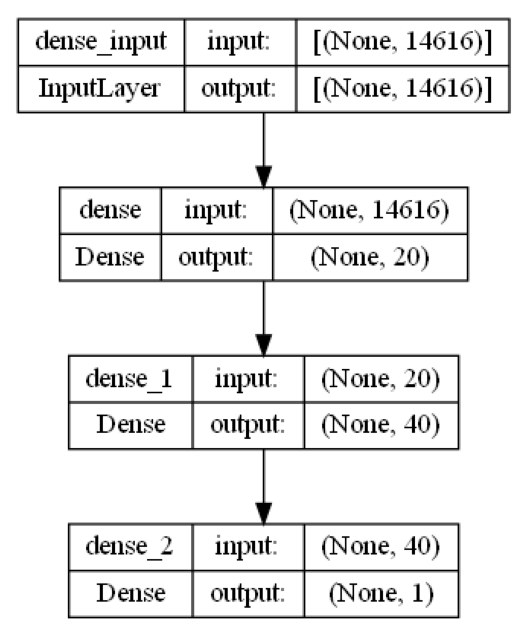

In [17]:
# Plot the model save to 'model_plot.png' for readme
plot_model(nn, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

# Show the model
plt.figure(figsize=(10, 8))
img = plt.imread('model_plot.png')
plt.imshow(img)
plt.axis('off')
plt.show()

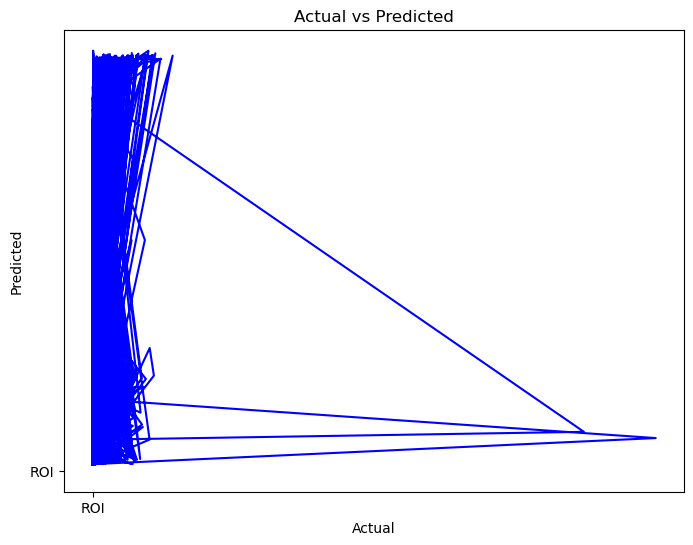

In [18]:
# Create a plot of actual vs predicted values
plt.figure(figsize=(8, 6))
plt.plot(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()

In [19]:
plt.savefig('model 1 tf keras sequential model.png') 

<Figure size 640x480 with 0 Axes>

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate R-squared
r_squared = r2_score(y_test, y_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("R-squared:", r_squared)

Even though the accuracy of the model is high at 94% the model's predictions aren't that reliable. This is demonstrated by the high MAE and MSE that the predictions are far from actual values. Negative R squared indicates the model is performing worse than average.

## Model 1 a: increase output layers by 1, add drop out rate

In [22]:
# Define the model

nn = tf.keras.models.Sequential()

# First hidden layer

nn.add(tf.keras.layers.Dense(units=20, input_dim=X_train.shape[1], activation="relu"))

# Second hidden layer

nn.add(tf.keras.layers.Dense(units=40, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=2, activation="linear"))

# Check the structure of the model
nn.summary()

# Compile the model

nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Train the model 

fit_model = nn.fit(X_train_scaled, y_train, epochs=100)

# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")




Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 20)                292340    
                                                                 
 dense_4 (Dense)             (None, 40)                840       
                                                                 
 dense_5 (Dense)             (None, 2)                 82        
                                                                 
Total params: 293,262
Trainable params: 293,262
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
767/767 [==============================] - 2s 2ms/step - loss: -1901.1919 - accuracy: 0.9389
Epoch 2/100
767/767 [==============================] - 2s 3ms/step - loss: -2008.2776 - accuracy: 0.9415
Epoch 3/100
767/767 [==============================] - 2s 3ms/step - loss: -2011.5729 - accuracy: 0.94

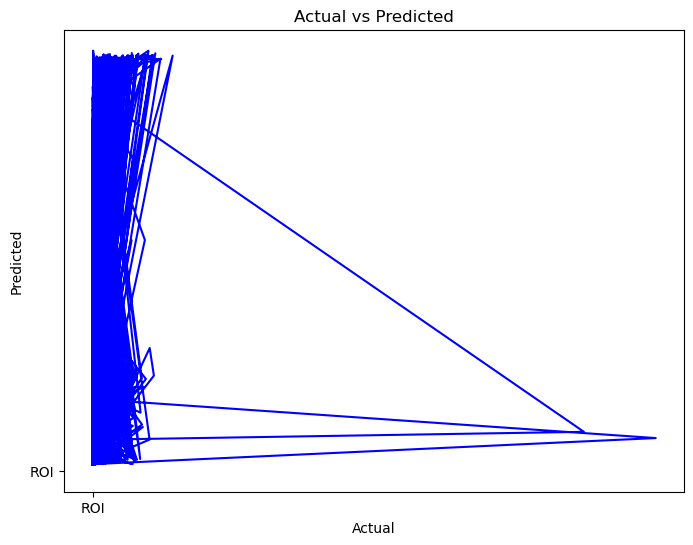

In [23]:
# Create a plot of actual vs predicted values
plt.figure(figsize=(8, 6))
plt.plot(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()

## **Model 2: Random Forest reduces overfitting and thus in theory improves model accuracy**

Top 10 Features:
1. SATMTMID (0.000051)
2. CUML_DEBT_N (0.000169)
3. INSTNM_UNITED STATES MERCHANT MARINE ACADEMY (0.000105)
4. TUITIONFEE_OUT (0.007200)
5. mn_earn_wne_p6 (0.000044)
6. TUITIONFEE_OUT (0.000295)
7. mn_earn_wne_p6 (0.000001)
8. INSTNM_United States Merchant Marine Academy (0.000021)
9. INSTNM_Webb Institute (0.000381)
10. total_cost (0.000374)


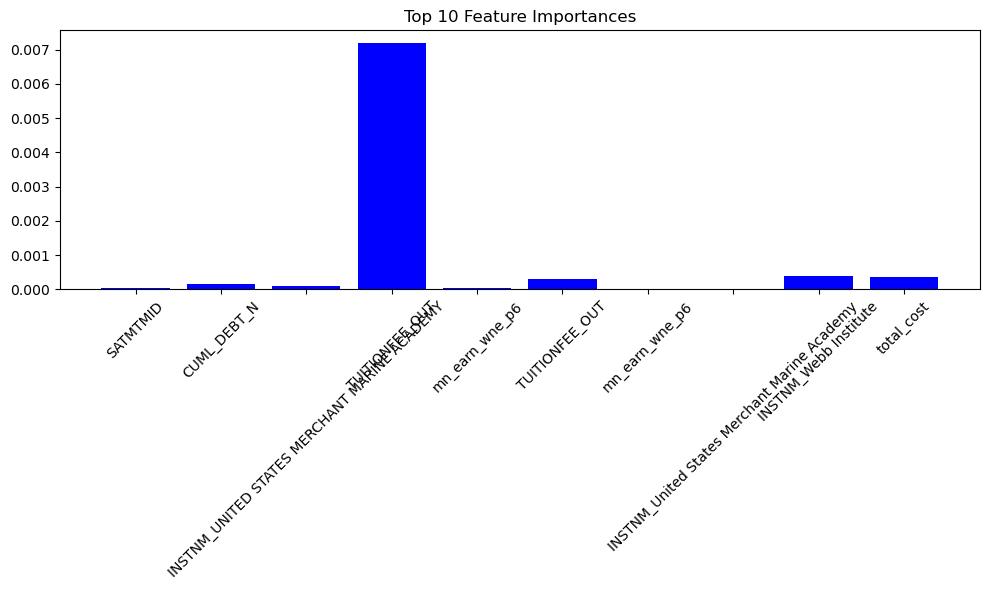

In [24]:
from sklearn.ensemble import RandomForestRegressor
rf_regressor = RandomForestRegressor()

# Fit the model on the sample data
rf_regressor.fit(X_train, y_train)

# Get feature importances
importances = rf_regressor.feature_importances_
indices = importances.argsort()[::-1]

# Get the names of features
feature_names = X_train.columns

# Get the top 10 feature indices and importances
top_indices = indices[:10][::-1]
top_importances = importances[:10][::-1]

# Get feature names
top_feature_names = [feature_names[i] for i in top_indices]

# Print the top 10 features
print("Top 10 Features:")
for i, feature_name in enumerate(top_feature_names):
    print("%d. %s (%f)" % (i + 1, feature_name, top_importances[i]))

# Plot the top 10 features
plt.figure(figsize=(10, 6))
plt.title("Top 10 Feature Importances")
plt.bar(range(len(top_feature_names)), top_importances, color="b", align="center")
plt.xticks(range(len(top_feature_names)), top_feature_names, rotation=45)
plt.tight_layout()
plt.show()

In [25]:
#Predictions on data
y_pred_rf = rf_regressor.predict(X_test)

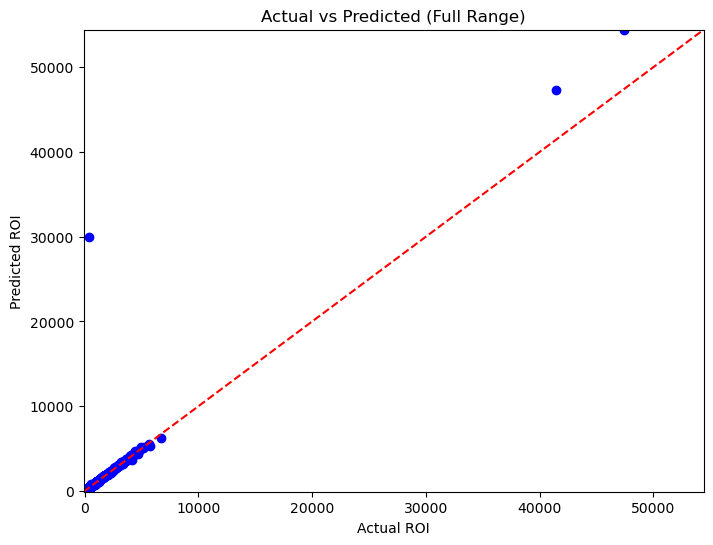

In [26]:
# Create scatter plot of actual vs predicted values
all_values = np.concatenate((y_test, y_pred_rf))


min_value = np.min(all_values)
max_value = np.max(all_values)

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_rf, color='blue')
plt.plot([min_value, max_value], [min_value, max_value], color='red', linestyle='--')
plt.xlabel('Actual ROI')
plt.ylabel('Predicted ROI')
plt.title('Actual vs Predicted (Full Range)')

# Get all ROI data
plt.xlim(min_value, max_value)
plt.ylim(min_value, max_value)

plt.show()

In [27]:
plt.savefig('model2randomforest.png')

<Figure size 640x480 with 0 Axes>

In [29]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

def transform(X):
    # Example: Standard scaling
    scaler = StandardScaler()
    X_transformed = scaler.fit_transform(X)
    return X_transformed

# Evaluate the model
X_test_rf = transform(X_test)

# Predictions on the transformed test set
y_pred_rf = rf_regressor.predict(X_test_rf)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred_rf)
mse = mean_squared_error(y_test, y_pred_rf)
rmse = np.sqrt(mse)

# Print evaluation metrics
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)

C:\Users\miesb\miniconda3\envs\dev\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Mean Absolute Error: 69317.34987625753
Mean Squared Error: 9596725060.676132
Root Mean Squared Error: 97962.87593101854


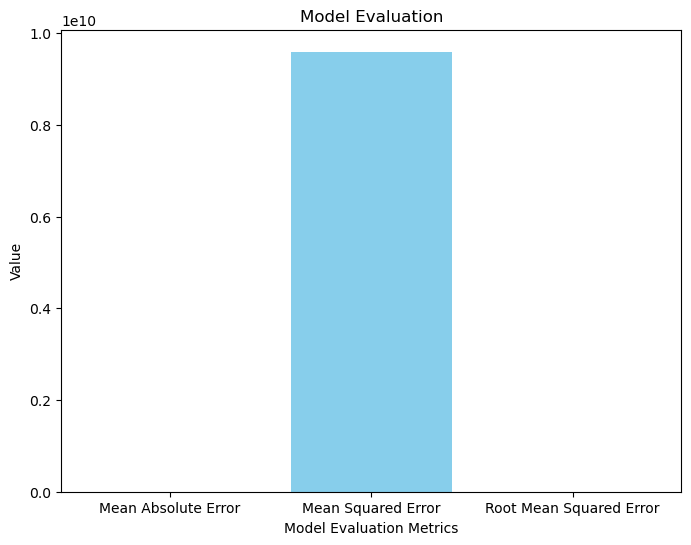

In [30]:
#Plot the model evaluation
labels = ['Mean Absolute Error', 'Mean Squared Error', 'Root Mean Squared Error']
values = [mae, mse, rmse]

plt.figure(figsize=(8, 6))
plt.bar(labels, values, color='skyblue')
plt.xlabel('Model Evaluation Metrics')
plt.ylabel('Value')
plt.title('Model Evaluation')
plt.show()

In [31]:
plt.savefig('model2randomforestMAEMSERME.png')

<Figure size 640x480 with 0 Axes>

tf keras sequential model:
Mean Absolute Error: 134.2688820475097
Mean Squared Error: 375544.6820230524
R-squared: -0.090899593575643

RandomForest model peforms worseMean Absolute Error: 69317.34987625753
Mean Squared Error: 9596725060.676132
Root Mean Squared Error: 97962.875931018548659

## **Model 3: Added a drop out rate, third hidden layer, and increased the neurons to model1 tf keras sequential model**

In [32]:
# # Define the model
# nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=64, input_dim=X_train.shape[1], activation="relu", kernel_regularizer=tf.keras.regularizers.l2(0.001)))
nn.add(tf.keras.layers.Dropout(0.2))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=32, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(0.001)))
nn.add(tf.keras.layers.Dropout(0.2))

# Third hidden layer
nn.add(tf.keras.layers.Dense(units=16, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(0.001)))
nn.add(tf.keras.layers.Dropout(0.2))

# Output layer
nn.add(tf.keras.layers.Dense(units=2, activation="linear"))

# Check the structure of the model
nn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 20)                292340    
                                                                 
 dense_4 (Dense)             (None, 40)                840       
                                                                 
 dense_5 (Dense)             (None, 2)                 82        
                                                                 
 dense_6 (Dense)             (None, 64)                192       
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_7 (Dense)             (None, 32)                2080      
                                                                 
 dropout_1 (Dropout)         (None, 32)               

In [33]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [34]:
# Train the model 
fit_model = nn.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
767/767 [==============================] - 7s 8ms/step - loss: -1982.3534 - accuracy: 0.9301
Epoch 2/100
767/767 [==============================] - 3s 4ms/step - loss: -2011.4180 - accuracy: 0.9400
Epoch 3/100
767/767 [==============================] - 2s 3ms/step - loss: -2010.9677 - accuracy: 0.9348
Epoch 4/100
767/767 [==============================] - 2s 3ms/step - loss: -2010.2258 - accuracy: 0.9377
Epoch 5/100
767/767 [==============================] - 2s 3ms/step - loss: -2011.6432 - accuracy: 0.9377
Epoch 6/100
767/767 [==============================] - 2s 3ms/step - loss: -2011.6548 - accuracy: 0.9323
Epoch 7/100
767/767 [==============================] - 2s 3ms/step - loss: -2011.0636 - accuracy: 0.9300
Epoch 8/100
767/767 [==============================] - 2s 3ms/step - loss: -2011.4575 - accuracy: 0.9303
Epoch 9/100
767/767 [==============================] - 2s 3ms/step - loss: -2011.1033 - accuracy: 0.9294
Epoch 10/100
767/767 [==============================] -

In [38]:
# Use the trained model to make predictions
y_pred = nn.predict(X_test_scaled)

# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

256/256 [==============================] - 0s 2ms/step
256/256 - 1s - loss: -2.0171e+03 - accuracy: 0.9422 - 678ms/epoch - 3ms/step
Loss: -2017.050048828125, Accuracy: 0.9422417879104614


In [44]:
print(y_pred)

[[ -6.1539083  12.232892 ]
 [-29.20742    58.161434 ]
 [-29.554533   58.85297  ]
 ...
 [ -3.9754276   7.892801 ]
 [-13.998731   27.861794 ]
 [ -2.273051    4.501226 ]]


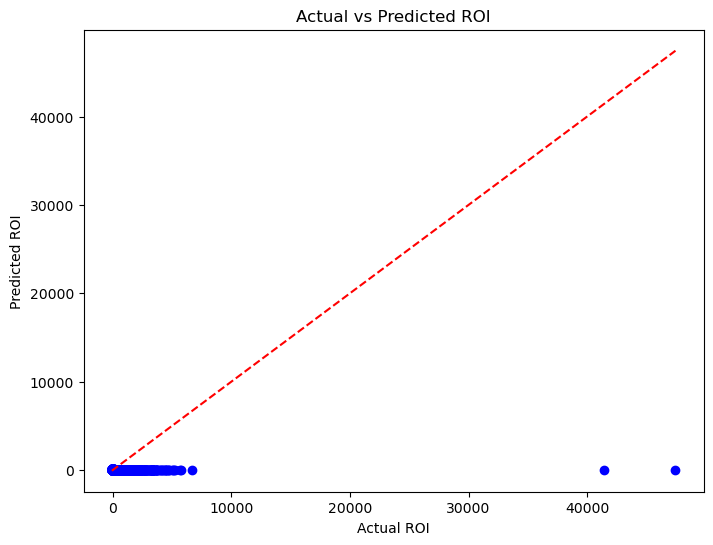

In [39]:
# Create a scatter plot of actual vs predicted values
actual_roi = y_test.iloc[:, -1]
predicted_roi = y_pred[:, -1]

# Plotting
plt.figure(figsize=(8, 6))
plt.scatter(actual_roi, predicted_roi, color='blue')
plt.plot([actual_roi.min(), actual_roi.max()], [actual_roi.min(), actual_roi.max()], color='red', linestyle='--')
plt.xlabel('Actual ROI')
plt.ylabel('Predicted ROI')
plt.title('Actual vs Predicted ROI')
plt.show()

In [41]:
plt.savefig('model3tfkerasdropoutrate.png')

<Figure size 640x480 with 0 Axes>

In [40]:
# Evaluate this model with drop out rates added
# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate RMSE
rmse = r2_score(y_test, y_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)

Mean Absolute Error: 138.28515786094198
Mean Squared Error: 374115.98571682
Root Mean Squared Error: -867.8831436959005


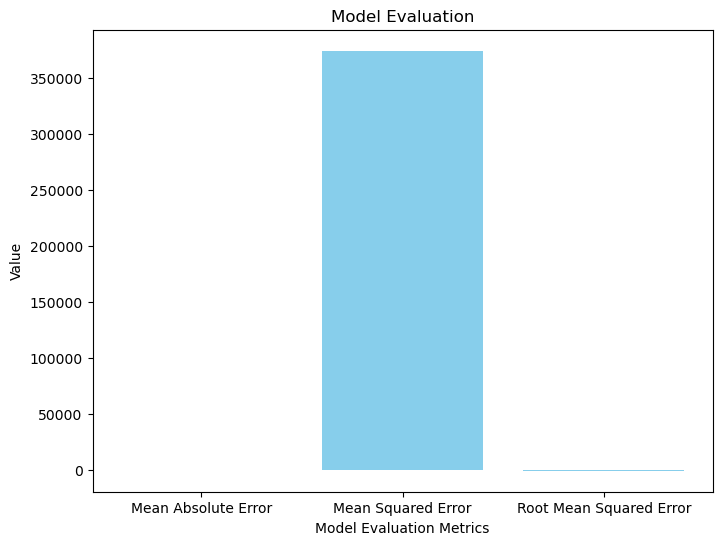

In [42]:
#Plot the model evaluation
labels = ['Mean Absolute Error', 'Mean Squared Error', 'Root Mean Squared Error']
values = [mae, mse, rmse]

plt.figure(figsize=(8, 6))
plt.bar(labels, values, color='skyblue')
plt.xlabel('Model Evaluation Metrics')
plt.ylabel('Value')
plt.title('Model Evaluation')
plt.show()

In [43]:
plt.savefig('model3tfkerasdropoutmodeleval.png')

<Figure size 640x480 with 0 Axes>